In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import xgboost as xgb
import lightgbm as lgb

from utils import *

In [49]:
cwd = os.getcwd()

full_data = pd.read_csv(os.path.join(cwd, 'data/ver2_house_sold.csv'))
full_data['Price'] = full_data['Price'].apply(np.log)
data = full_data[[
    'Suburb', 'Bedrms', 'Bathrms', 'Cars', 'LandSize', 'BuildingArea', 'YearBuilt', 'Price',
    'Month', 'Year'
]]
#'ICSEA_Primary','ICSEA_Year7','IRSD','IRSAD','IER','IEO','Population'
pd.options.mode.chained_assignment = None
data_wt = data.drop(columns=['Year','Month']).iloc[:0]
for year in np.linspace(2013.0,2017.0,5):
    for month in np.linspace(1.0,12.0,12):
        temp_data = data[(data['Year']==year) & (data['Month']==month)]
        # c, loc, scale = fisk.fit(temp_data['Price'], loc = 0, scale = 1)
        # pct = burr.cdf(temp_data['Price'],c,loc,scale)
        # temp_data = temp_data.drop(columns=['Year','Month'])
        mean = sum(temp_data['Price'])/len(temp_data['Price'])
        var = np.var(temp_data['Price'])
        temp_data['Market'] = mean #[(np.random.random()-0.5)*var*0.0001+mean for i in range(temp_data.shape[0])]
        data_wt = pd.concat([data_wt,temp_data],ignore_index=True)
data_wt

Suburb  Bedrms  Bathrms  Cars  LandSize  BuildingArea  \
0           Aberfeldie     3.0      2.0   2.0     613.0           NaN   
1         Airport West     4.0      1.0   3.0     696.0         150.0   
2         Airport West     3.0      1.0   1.0     417.0         125.0   
3         Airport West     3.0      1.0   1.0     613.0           NaN   
4         Airport West     3.0      1.0   2.0       NaN          75.0   
...                ...     ...      ...   ...       ...           ...   
292848  Yarra Junction     3.0      1.0   0.0     497.0          90.0   
292849      Yarraville     3.0      1.0   1.0     194.0          88.0   
292850      Yarraville     3.0      1.0   1.0     339.0         105.0   
292851      Yarraville     3.0      1.0   2.0       NaN         118.0   
292852      Yarraville     4.0      1.0   2.0     468.0         116.0   

        YearBuilt      Price  Month    Year     Market  
0             NaN  13.826450    1.0  2013.0  13.029796  
1          1950.0  13.270783    1.0  2013.0  13.029796  
2          1975.0  12.899220    1.0  2013.0  13.029796  
3             NaN  13.208541    1.0  2013.0  13.029796  
4          2007.0  13.047640    1.0  2013.0  13.029796  
...           ...        ...    ...     ...        ...  
292848     1950.0  13.017003   12.0  2017.0  13.576504  
292849     1948.0  13.737549   12.0  2017.0  13.576504  
292850     1910.0  14.034646   12.0  2017.0  13.576504  
292851     1928.0  13.790193   12.0  2017.0  13.576504  
292852     1950.0  13.753635   12.0  2017.0  13.576504  

[292853 rows x 11 columns]

## Upper Bound

In [50]:
data_wt['Suburb'] = data_wt['Suburb'].astype('category')
X = data_wt.drop(columns=['Price'])
y = data_wt['Price']

In [43]:
data_wt['Suburb'].value_counts()

Pakenham         5917
Berwick          4943
Frankston        3953
Point Cook       3866
Craigieburn      3759
                 ... 
Watsons Creek       1
Keilor North        1
Caldermeade         1
Bylands             1
Bunyip North        1
Name: Suburb, Length: 504, dtype: int64

In [44]:
X.shape

(292853, 8)

In [45]:
y.shape

(292853,)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [51]:
from skpp import ProjectionPursuitRegressor
estimator = ProjectionPursuitRegressor()
estimator.fit(X_train,y_train)

ProjectionPursuitRegressor()

In [52]:
y_pred = estimator.predict(X_test)

In [64]:
[y_pred[i]-y_test.iloc[i] for i in range(len(y_test))]

[-0.018039135636785275,
 -0.03850365838850145,
 0.7844684539238838,
 0.044966131807886,
 2.1105963101560956,
 0.2335207616712438,
 -0.8582250479895919,
 0.0062661520385685066,
 -0.04375329714685172,
 0.04502575409288845,
 -0.3810795412597763,
 0.06590851413782772,
 -0.26146167712693646,
 0.6926130574243601,
 -0.11749574104665328,
 0.13875130470661645,
 -0.20560294744228536,
 0.16748432867168894,
 -0.03733450675149541,
 0.015191935243901611,
 0.250822900189144,
 -0.33428723498088075,
 0.08688328045556659,
 -0.07629931890961394,
 0.1498437032401707,
 0.07720666256747144,
 -0.05171677913228656,
 0.056016328042225894,
 0.057357295793407204,
 0.18710927750066908,
 -0.008433518097778148,
 -0.03259455955666901,
 0.15559535745294184,
 -0.3308385381011387,
 -0.33323369846785766,
 0.02606826510829663,
 -0.13510970715259418,
 -0.2694954000189629,
 -0.003155243352017223,
 0.7767635597172653,
 -0.2036823440427522,
 -0.05020270288532913,
 -0.18131702498112645,
 0.051016424163378815,
 -0.195489725614

In [57]:
y_test

102422    13.864301
43737     13.878485
113116    13.005830
2794      12.549662
45156     11.918391
            ...    
68777     14.304091
149615    12.867471
133821    13.495305
71152     14.380824
59383     13.446618
Name: Price, Length: 32054, dtype: float64

In [68]:
np.mean(abs(pct_error(y_test, y_pred, log=False)))

16.692856373868615

In [52]:
model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1)
model.fit(X_train, y_train, eval_set=[(X_dev, y_dev)])


c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's l2: 0.500946
[2]	valid_0's l2: 0.457393
[3]	valid_0's l2: 0.4218
[4]	valid_0's l2: 0.39206
[5]	valid_0's l2: 0.367816
[6]	valid_0's l2: 0.347551
[7]	valid_0's l2: 0.330865
[8]	valid_0's l2: 0.316921
[9]	valid_0's l2: 0.305408
[10]	valid_0's l2: 0.295741
[11]	valid_0's l2: 0.287823
[12]	valid_0's l2: 0.280918
[13]	valid_0's l2: 0.275209
[14]	valid_0's l2: 0.270293
[15]	valid_0's l2: 0.266202
[16]	valid_0's l2: 0.262462
[17]	valid_0's l2: 0.259248
[18]	valid_0's l2: 0.256528
[19]	valid_0's l2: 0.254163
[20]	valid_0's l2: 0.251945
[21]	valid_0's l2: 0.249994
[22]	valid_0's l2: 0.248462
[23]	valid_0's l2: 0.247173
[24]	valid_0's l2: 0.245793
[25]	valid_0's l2: 0.24449
[26]	valid_0's l2: 0.2435
[27]	valid_0's l2: 0.242738
[28]	valid_0's l2: 0.242034
[29]	valid_0's l2: 0.241104
[30]	valid_0's l2: 0.240363
[31]	valid_0's l2: 0.239396
[32]	valid_0's l2: 0.239002
[33]	valid_0's l2: 0.237954
[34]	valid_0's l2: 0.237278
[35]	valid_0's l2: 0.236414
[36]	valid_0's l2: 0.235687
[37]	va

LGBMRegressor(n_estimators=1000, num_leaves=500, reg_alpha=0)

In [37]:
y_p = model.predict(X_test)
np.mean(abs(pct_error(y_test, y_p, log=False)))

78641.05335882826

## Month to Month

In [4]:
cwd = os.getcwd()

full_data = pd.read_csv(os.path.join(cwd, 'data/full_v3_suburb_history_median.csv'))
full_data['Price'] = full_data['Price'].apply(np.log)
data = full_data#.drop(columns=['PropID','ICSEA_Primary','ICSEA_Year7','IRSD','IRSAD','IER','IEO','Population'])
#'ICSEA_Primary','ICSEA_Year7','IRSD','IRSAD','IER','IEO','Population'
pd.options.mode.chained_assignment = None
data_wt = []
for year in np.linspace(2013.0,2017.0,5):
    for month in np.linspace(1.0,12.0,12):
        temp_data = data[(data['Year']==year) & (data['Month']==month)]
        # c, loc, scale = fisk.fit(temp_data['Price'], loc = 0, scale = 1)
        # pct = burr.cdf(temp_data['Price'],c,loc,scale)
        # temp_data = temp_data.drop(columns=['Year','Month'])
        # temp_data['mean'] = sum(temp_data['Price'])/len(temp_data['Price'])
        # temp_data['var'] = np.var(temp_data['Price'])
        data_wt.append(temp_data)
data_wt

[        Bedrms  Bathrms  Cars  LandSize  BuildingArea  YearBuilt  Month  \
 682        2.0      1.0   0.0      82.0          71.0     1910.0    1.0   
 780        2.0      1.0   0.0      82.0          71.0     1910.0    1.0   
 864        3.0      2.0   0.0     691.0         176.0     1930.0    1.0   
 1132       4.0      2.0   2.0     464.0         150.0     2006.0    1.0   
 1342       4.0      2.0   1.0     464.0         184.0     2000.0    1.0   
 ...        ...      ...   ...       ...           ...        ...    ...   
 159116     3.0      1.0   1.0     400.0         113.0     2006.0    1.0   
 159173     3.0      1.0   1.0     565.0           0.0     1985.0    1.0   
 159276     4.0      2.0   2.0     565.0         170.0     1990.0    1.0   
 159324     3.0      1.0   1.0     532.0           0.0     1988.0    1.0   
 159757     3.0      2.0   2.0     510.0         158.0     2006.0    1.0   
 
           Year  ICSEA_Primary  ICSEA_Year7  ...     IEO  Population  YoY  \
 682     

In [1]:
def nMonthBoost(dataList, n = 1):
    mapes = [0,0]
    for i in tqdm(range(len(dataList)-n)):
        train_data = dataList[i]
        for entry in dataList[i+1:i+n]:
            train_data = pd.concat([train_data,entry],ignore_index=True)
        X = train_data.drop(columns=['Price', 'Year', 'Month'])
        y = train_data['Price']
        X_train, X_dev, y_train, y_dev = train_test_split(X,y,test_size=0.2)
        model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1, device_type='gpu', verbose=-100)
        model.fit(X_train, y_train, eval_set=[(X_dev, y_dev)], verbose=False)
        X_test = dataList[i+n].drop(columns=['Price', 'Year', 'Month'])
        y_test = dataList[i+n]['Price']
        y_p = model.predict(X_test)
        mapes[0] += np.sum(abs(pct_error(y_test, y_p, log=False)))
        mapes[1] += len(y_p)
    return mapes[0]/mapes[1]

In [76]:
nMonthBoost(data_wt)

[1]	valid_0's l2: 0.198673
[2]	valid_0's l2: 0.17092
[3]	valid_0's l2: 0.148521
[4]	valid_0's l2: 0.130049
[5]	valid_0's l2: 0.115128
[6]	valid_0's l2: 0.102944
[7]	valid_0's l2: 0.0926672
[8]	valid_0's l2: 0.0846272
[9]	valid_0's l2: 0.0779867
[10]	valid_0's l2: 0.0716708
[11]	valid_0's l2: 0.0663733
[12]	valid_0's l2: 0.06256
[13]	valid_0's l2: 0.0589528
[14]	valid_0's l2: 0.0562151
[15]	valid_0's l2: 0.053437
[16]	valid_0's l2: 0.0512373
[17]	valid_0's l2: 0.0491536
[18]	valid_0's l2: 0.0472771
[19]	valid_0's l2: 0.0456508
[20]	valid_0's l2: 0.0446076
[21]	valid_0's l2: 0.0434974
[22]	valid_0's l2: 0.0426647
[23]	valid_0's l2: 0.0417612
[24]	valid_0's l2: 0.0408554
[25]	valid_0's l2: 0.0405967
[26]	valid_0's l2: 0.0401629
[27]	valid_0's l2: 0.0397305
[28]	valid_0's l2: 0.0394548
[29]	valid_0's l2: 0.0393472
[30]	valid_0's l2: 0.0391982
[31]	valid_0's l2: 0.0388615
[32]	valid_0's l2: 0.0387555
[33]	valid_0's l2: 0.0387133
[34]	valid_0's l2: 0.038586
[35]	valid_0's l2: 0.0384131
[36]	

14.764643781231566

In [79]:
nMonthBoost(data_wt, 2)

[1]	valid_0's l2: 0.191629
[2]	valid_0's l2: 0.164223
[3]	valid_0's l2: 0.142611
[4]	valid_0's l2: 0.124041
[5]	valid_0's l2: 0.109624
[6]	valid_0's l2: 0.0971111
[7]	valid_0's l2: 0.0871369
[8]	valid_0's l2: 0.0790224
[9]	valid_0's l2: 0.0723369
[10]	valid_0's l2: 0.0669991
[11]	valid_0's l2: 0.0624951
[12]	valid_0's l2: 0.0585711
[13]	valid_0's l2: 0.0552716
[14]	valid_0's l2: 0.0527604
[15]	valid_0's l2: 0.0503012
[16]	valid_0's l2: 0.0481569
[17]	valid_0's l2: 0.0467099
[18]	valid_0's l2: 0.0451122
[19]	valid_0's l2: 0.0439042
[20]	valid_0's l2: 0.0430378
[21]	valid_0's l2: 0.0421585
[22]	valid_0's l2: 0.0412369
[23]	valid_0's l2: 0.0407018
[24]	valid_0's l2: 0.0401414
[25]	valid_0's l2: 0.0396326
[26]	valid_0's l2: 0.0390371
[27]	valid_0's l2: 0.0385017
[28]	valid_0's l2: 0.0378615
[29]	valid_0's l2: 0.0373667
[30]	valid_0's l2: 0.0369539
[31]	valid_0's l2: 0.0364889
[32]	valid_0's l2: 0.0362805
[33]	valid_0's l2: 0.0360755
[34]	valid_0's l2: 0.0359575
[35]	valid_0's l2: 0.0356872

13.996204091644978

In [82]:
nMonthBoost(data_wt, 3)

[1]	valid_0's l2: 0.257355
[2]	valid_0's l2: 0.218458
[3]	valid_0's l2: 0.187164
[4]	valid_0's l2: 0.161474
[5]	valid_0's l2: 0.140586
[6]	valid_0's l2: 0.123484
[7]	valid_0's l2: 0.109259
[8]	valid_0's l2: 0.097414
[9]	valid_0's l2: 0.0878444
[10]	valid_0's l2: 0.0800382
[11]	valid_0's l2: 0.0737344
[12]	valid_0's l2: 0.0682227
[13]	valid_0's l2: 0.0638707
[14]	valid_0's l2: 0.0600627
[15]	valid_0's l2: 0.0569613
[16]	valid_0's l2: 0.0542811
[17]	valid_0's l2: 0.0520785
[18]	valid_0's l2: 0.0504892
[19]	valid_0's l2: 0.0491392
[20]	valid_0's l2: 0.0479037
[21]	valid_0's l2: 0.0469184
[22]	valid_0's l2: 0.0458834
[23]	valid_0's l2: 0.0450235
[24]	valid_0's l2: 0.0442024
[25]	valid_0's l2: 0.0436081
[26]	valid_0's l2: 0.043276
[27]	valid_0's l2: 0.0428367
[28]	valid_0's l2: 0.0424928
[29]	valid_0's l2: 0.0421082
[30]	valid_0's l2: 0.0418098
[31]	valid_0's l2: 0.0414639
[32]	valid_0's l2: 0.0411632
[33]	valid_0's l2: 0.0408944
[34]	valid_0's l2: 0.0406352
[35]	valid_0's l2: 0.0405178
[36

13.632644658207065

In [5]:
nMonthBoost(data_wt, 4)

  0%|          | 0/56 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/56 [00:37<34:46, 37.94s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▎         | 2/56 [01:19<36:09, 40.18s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' 

13.361927677775522

In [6]:
nMonthBoost(data_wt, 5)

  0%|          | 0/55 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/55 [00:50<45:31, 50.58s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▎         | 2/55 [01:46<47:42, 54.01s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' 

13.183672094627198

In [7]:
nMonthBoost(data_wt, 6)

  0%|          | 0/54 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/54 [01:03<56:01, 63.43s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▎         | 2/54 [02:10<56:50, 65.59s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' 

12.986055856006566

In [8]:
nMonthBoost(data_wt, 7)

  0%|          | 0/53 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/53 [01:14<1:04:44, 74.71s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▍         | 2/53 [02:33<1:05:40, 77.26s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation

12.84371923557403

In [9]:
nMonthBoost(data_wt, 8)

  0%|          | 0/52 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/52 [01:20<1:08:13, 80.26s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▍         | 2/52 [02:41<1:07:33, 81.07s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation

12.725626783767131

In [10]:
nMonthBoost(data_wt, 9)

  0%|          | 0/51 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/51 [01:21<1:07:42, 81.25s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▍         | 2/51 [02:43<1:07:01, 82.08s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation

12.66132984661325

In [11]:
nMonthBoost(data_wt, 10)

  0%|          | 0/50 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/50 [01:22<1:07:01, 82.07s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▍         | 2/50 [02:43<1:05:33, 81.96s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation

12.562220290610956

In [12]:
nMonthBoost(data_wt, 11)

  0%|          | 0/49 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/49 [01:10<56:28, 70.60s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▍         | 2/49 [02:22<55:55, 71.39s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' 

12.502404514318082

In [13]:
nMonthBoost(data_wt, 12)

  0%|          | 0/48 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  2%|▏         | 1/48 [01:11<55:54, 71.38s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
  4%|▍         | 2/48 [02:22<54:38, 71.27s/it]c:\ProgramData\Miniconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' 

12.379522528349298

# Two Step Model

In [2]:
def get_index(entry):
    id = entry['PropID']
    year = entry['Year']
    month = entry['Month']
    query = full_data[full_data['PropID']==id].reset_index()
    if query.shape[0] < 2:
        return np.nan
    index = query[query['Price']==entry['Price']].index[0]
    return np.nan if index < 1 else query.loc[index-1]['Hindex']

In [19]:
cwd = os.getcwd()

# All history
full_data = pd.read_csv(os.path.join(cwd, 'data/ver2_index.csv'))
full_data['Price'] = full_data['Price'].apply(np.log)

# Data for experiments
exp_data = pd.read_csv(os.path.join(cwd, 'data/full_v3.csv'))
exp_data['Price'] = exp_data['Price'].apply(np.log)

#'ICSEA_Primary','ICSEA_Year7','IRSD','IRSAD','IER','IEO','Population'
pd.options.mode.chained_assignment = None
data_wt = exp_data.drop(columns=['Year','Month']).iloc[:0]
for year in np.linspace(2013.0,2017.0,5):
    for month in np.linspace(1.0,12.0,12):
        temp_data = exp_data[(exp_data['Year']==year) & (exp_data['Month']==month)]
        Q1, Q2, Q3 = np.quantile(temp_data['Price'],[0.25,0.5,0.75])
        # temp_data['Index'] = temp_data.apply(lambda x:get_index(x), axis=1)
        # temp_data = temp_data.drop(columns=['Year','Month','PropID','Suburb'])
        if year == 2013.0 and month == 1.0:
            temp_data[['Q1','Q2','Q3']] = [Q1, Q2, Q3]
        else:
            temp_data[['Q1','Q2','Q3']] = old
        old = [Q1, Q2, Q3]
        
        temp_data['Hindex'] = temp_data.apply(lambda row:  0.0 if row['Price']<row['Q1'] else 
                        (1.0 if row['Price']<row['Q2'] else 
                        (2.0 if row['Price']<row['Q2'] else 3.0)), axis=1)
        data_wt = pd.concat([data_wt,temp_data],ignore_index=True)
data_wt

Bedrms  Bathrms  Cars  LandSize  BuildingArea  YearBuilt      Price  \
0          2.0      1.0   0.0      82.0          71.0     1910.0  13.592367   
1          2.0      1.0   0.0      82.0          71.0     1910.0  13.592367   
2          3.0      2.0   0.0     691.0         176.0     1930.0  13.883169   
3          4.0      2.0   2.0     464.0         150.0     2006.0  12.923912   
4          4.0      2.0   1.0     464.0         184.0     2000.0  13.049793   
...        ...      ...   ...       ...           ...        ...        ...   
160264     4.0      2.0   2.0     448.0         171.0     2012.0  13.180632   
160265     3.0      2.0   4.0    1258.0         191.0     2001.0  13.422468   
160266     3.0      2.0   2.0     602.0         139.0     2010.0  13.223113   
160267     3.0      2.0   2.0     100.0         136.0     1985.0  13.304685   
160268     3.0      1.0   0.0     497.0          90.0     1950.0  13.017003   

        ICSEA_Primary  ICSEA_Year7  IRSD  ...     IEO  Population  \
0              1155.0       1116.0  1085  ...  1167.0      6215.0   
1              1155.0       1116.0  1085  ...  1167.0      6215.0   
2              1168.0       1096.0  1095  ...  1145.0      5080.0   
3              1098.0        923.0   980  ...   953.0     19160.0   
4              1098.0        923.0   980  ...   953.0     19160.0   
...               ...          ...   ...  ...     ...         ...   
160264         1015.0       1000.0   988  ...   952.0     23273.0   
160265         1007.0        961.0   981  ...   948.0      2549.0   
160266         1007.0        961.0   981  ...   948.0      2549.0   
160267         1007.0        961.0   981  ...   948.0      2549.0   
160268         1007.0        961.0   981  ...   948.0      2549.0   

                              PropID          Suburb Month    Year         Q1  \
0           Albert_Park_VIC_3206_647     Albert Park   1.0  2013.0  12.718896   
1           Albert_Park_VIC_3206_915     Albert Park   1.0  2013.0  12.718896   
2            Alphington_VIC_3078_347      Alphington   1.0  2013.0  12.718896   
3        Altona_Meadows_VIC_3028_872  Altona Meadows   1.0  2013.0  12.718896   
4       Altona_Meadows_VIC_3028_1654  Altona Meadows   1.0  2013.0  12.718896   
...                              ...             ...   ...     ...        ...   
160264    Wyndham_Vale_VIC_3024_3314    Wyndham Vale  12.0  2017.0  13.240813   
160265    Yarra_Junction_VIC_3797_47  Yarra Junction  12.0  2017.0  13.240813   
160266   Yarra_Junction_VIC_3797_173  Yarra Junction  12.0  2017.0  13.240813   
160267   Yarra_Junction_VIC_3797_253  Yarra Junction  12.0  2017.0  13.240813   
160268   Yarra_Junction_VIC_3797_292  Yarra Junction  12.0  2017.0  13.240813   

               Q2         Q3  Hindex  
0       12.959844  13.270783     3.0  
1       12.959844  13.270783     3.0  
2       12.959844  13.270783     3.0  
3       12.959844  13.270783     1.0  
4       12.959844  13.270783     3.0  
...           ...        ...     ...  
160264  13.473020  13.886085     0.0  
160265  13.473020  13.886085     1.0  
160266  13.473020  13.886085     0.0  
160267  13.473020  13.886085     1.0  
160268  13.473020  13.886085     0.0  

[160269 rows x 22 columns]

In [44]:
full_data[full_data['PropID']=='Aspendale_VIC_3195_196']

level_0                  PropID     Suburb  PostalCode  Latitude  \
846155    846155  Aspendale_VIC_3195_196  Aspendale      3195.0 -38.02452   
1182761  1182761  Aspendale_VIC_3195_196  Aspendale      3195.0 -38.02452   

          Longitude  Bedrms  Bathrms  Cars  LandSize  ...    Year  \
846155   145.106955     3.0      1.0   1.0     529.0  ...  2012.0   
1182761  145.106955     3.0      2.0   4.0     529.0  ...  2017.0   

                                   AgentName  \
846155   Area Specialist - Aspendale Gardens   
1182761                Hockingstuart Chelsea   

                                                 AgentAddr        Q1  \
846155   Shop 13, 11 Narelle Drive Aspendale Gardens Sh...  352000.0   
1182761                                                NaN  575000.0   

               Q2        Q3       vQ1       vQ2       vQ3  Hindex  
846155   455000.0  660000.0  1.463068  1.131868  0.780303     3.0  
1182761  710000.0  996000.0  1.860870  1.507042  1.074297     3.0  

[2 rows x 25 columns]

In [43]:
exp_data.loc[3923]

PropID           Aspendale_VIC_3195_196
Suburb                        Aspendale
Bedrms                              3.0
Bathrms                             2.0
Cars                                4.0
LandSize                          529.0
BuildingArea                      128.0
YearBuilt                        1960.0
Price                         13.883169
Month                              12.0
Year                             2017.0
ICSEA_Primary                    1093.0
ICSEA_Year7                      1046.0
IRSD                               1093
IRSAD                              1089
IER                                1075
IEO                              1086.0
Population                       6940.0
Name: 3923, dtype: object

In [ ]:
data_wt['Hindex'] = data_wt.apply(lambda x:get_index(x), axis=1)

In [59]:
exp_data.apply(lambda x:get_index(x), axis=1)

2856      3.0
3923      3.0
5079      3.0
5308      3.0
7713      NaN
         ... 
159768    0.0
160157    1.0
160187    1.0
160202    1.0
160213    0.0
Length: 443, dtype: float64

In [17]:
X = data_wt.drop(columns=['Price'])
y = data_wt['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5)
model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1)
model.fit(X_train, y_train, eval_set=[(X_dev, y_dev)])

[1]	valid_0's l2: 0.291837
[2]	valid_0's l2: 0.242388
[3]	valid_0's l2: 0.202086
[4]	valid_0's l2: 0.169381
[5]	valid_0's l2: 0.142559
[6]	valid_0's l2: 0.120922
[7]	valid_0's l2: 0.103139
[8]	valid_0's l2: 0.0886856
[9]	valid_0's l2: 0.0767063
[10]	valid_0's l2: 0.0669951
[11]	valid_0's l2: 0.0589991
[12]	valid_0's l2: 0.0524624
[13]	valid_0's l2: 0.0470842
[14]	valid_0's l2: 0.0426384
[15]	valid_0's l2: 0.0389849
[16]	valid_0's l2: 0.0359936
[17]	valid_0's l2: 0.0334878
[18]	valid_0's l2: 0.0314284
[19]	valid_0's l2: 0.0296908
[20]	valid_0's l2: 0.0282235
[21]	valid_0's l2: 0.0269874
[22]	valid_0's l2: 0.0259562
[23]	valid_0's l2: 0.0250602
[24]	valid_0's l2: 0.0242941
[25]	valid_0's l2: 0.0236319
[26]	valid_0's l2: 0.0230861
[27]	valid_0's l2: 0.0226031
[28]	valid_0's l2: 0.0221413
[29]	valid_0's l2: 0.0217479
[30]	valid_0's l2: 0.0214252
[31]	valid_0's l2: 0.0211283
[32]	valid_0's l2: 0.0208715
[33]	valid_0's l2: 0.0206585
[34]	valid_0's l2: 0.0204278
[35]	valid_0's l2: 0.0202111
[

LGBMRegressor(n_estimators=1000, num_leaves=500, reg_alpha=0)

In [18]:
y_p = model.predict(X_test)
np.mean(abs(pct_error(y_test, y_p, log=False)))

7.489586313119273

In [20]:
data_train = data_wt[(data_wt['Year']<2017)].drop(columns=['Year','Month','PropID','Suburb'])
data_test = data_wt[(data_wt['Year']>2016)].drop(columns=['Year','Month','PropID','Suburb'])
X_train, X_dev, y_train, y_dev = train_test_split(data_train.drop(columns=['Price']),data_train['Price'],test_size=0.2)
X_test, y_test = data_test.drop(columns=['Price']),data_test['Price']
model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1)
model.fit(X_train, y_train, eval_set=[(X_dev, y_dev)])

[1]	valid_0's l2: 0.29039
[2]	valid_0's l2: 0.241173
[3]	valid_0's l2: 0.201154
[4]	valid_0's l2: 0.168509
[5]	valid_0's l2: 0.141843
[6]	valid_0's l2: 0.120172
[7]	valid_0's l2: 0.102428
[8]	valid_0's l2: 0.0879731
[9]	valid_0's l2: 0.0761517
[10]	valid_0's l2: 0.0664284
[11]	valid_0's l2: 0.0584425
[12]	valid_0's l2: 0.0519355
[13]	valid_0's l2: 0.0466125
[14]	valid_0's l2: 0.0421703
[15]	valid_0's l2: 0.0385379
[16]	valid_0's l2: 0.035512
[17]	valid_0's l2: 0.0329926
[18]	valid_0's l2: 0.0308946
[19]	valid_0's l2: 0.0291801
[20]	valid_0's l2: 0.0277293
[21]	valid_0's l2: 0.0265071
[22]	valid_0's l2: 0.0254643
[23]	valid_0's l2: 0.0245384
[24]	valid_0's l2: 0.023776
[25]	valid_0's l2: 0.0230958
[26]	valid_0's l2: 0.022538
[27]	valid_0's l2: 0.022031
[28]	valid_0's l2: 0.0216079
[29]	valid_0's l2: 0.021229
[30]	valid_0's l2: 0.0208911
[31]	valid_0's l2: 0.0205921
[32]	valid_0's l2: 0.0203313
[33]	valid_0's l2: 0.0200996
[34]	valid_0's l2: 0.0198947
[35]	valid_0's l2: 0.0196862
[36]	va

LGBMRegressor(n_estimators=1000, num_leaves=500, reg_alpha=0)

In [21]:
y_p = model.predict(X_test)
np.mean(abs(pct_error(y_test, y_p, log=False)))

11.39799440780645

In [30]:
result = []
data = data_wt[(data_wt['Year']>2016)]
for month in np.linspace(1.0,12.0,12):
    temp_data = data[data['Month']==month]
    y_p = model.predict(temp_data.drop(columns=['Year','Month','PropID','Suburb','Price']))
    y_true = temp_data['Price']
    if month == 1:
        result.append((np.mean(abs(pct_error(y_true, y_p, log=False))),temp_data.shape[0]))
    else:
        y_corr = y_p+temp_model.predict(temp_data.drop(columns=['Year','Month','PropID','Suburb','Price']))
        result.append((np.mean(abs(pct_error(y_true, y_corr, log=False))),temp_data.shape[0]))
    e = y_true - y_p
    temp_model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1)
    temp_model.fit(temp_data.drop(columns=['Year','Month','PropID','Suburb','Price']), e)


In [31]:
result

[(8.125434111020992, 1344),
 (12.052934184039298, 2721),
 (12.624666133119565, 3648),
 (10.420683247009432, 2908),
 (10.017395728965527, 3270),
 (9.945947361734474, 2731),
 (8.95971264321843, 2839),
 (10.691069955236191, 2862),
 (11.262312855484277, 2731),
 (10.911888331773543, 2711),
 (10.185739832211993, 992),
 (10.427992919755743, 443)]

In [33]:
np.sum([r[0]*r[1] for r in result])/np.sum([r[1] for r in result])

10.653830117577934

# Noise

In [35]:
cwd = os.getcwd()

# All history
full_data = pd.read_csv(os.path.join(cwd, 'data/ver2_index.csv'))
full_data['Price'] = full_data['Price'].apply(np.log)

# Data for experiments
exp_data = pd.read_csv(os.path.join(cwd, 'data/full_v3.csv'))
exp_data['Price'] = exp_data['Price'].apply(np.log)

#'ICSEA_Primary','ICSEA_Year7','IRSD','IRSAD','IER','IEO','Population'
pd.options.mode.chained_assignment = None
data_wt = exp_data.drop(columns=['Year','Month']).iloc[:0]
for year in np.linspace(2013.0,2017.0,5):
    for month in np.linspace(1.0,12.0,12):
        temp_data = exp_data[(exp_data['Year']==year) & (exp_data['Month']==month)]
        Q1, Q2, Q3 = np.quantile(temp_data['Price'],[0.25,0.5,0.75])
        # temp_data['Index'] = temp_data.apply(lambda x:get_index(x), axis=1)
        # temp_data = temp_data.drop(columns=['Year','Month','PropID','Suburb'])
        temp_data[['Q1','Q2','Q3']] = [[Q1+(np.random.random()-0.5)*0.1, Q2+(np.random.random()-0.5)*0.1, Q3+(np.random.random()-0.5)*0.1] for i in range(temp_data.shape[0])]

        
        temp_data['Hindex'] = temp_data.apply(lambda row:  0.0 if row['Price']<row['Q1'] else 
                        (1.0 if row['Price']<row['Q2'] else 
                        (2.0 if row['Price']<row['Q2'] else 3.0)), axis=1)
        data_wt = pd.concat([data_wt,temp_data],ignore_index=True)
data_wt

PropID          Suburb  Bedrms  Bathrms  Cars  \
0           Albert_Park_VIC_3206_647     Albert Park     2.0      1.0   0.0   
1           Albert_Park_VIC_3206_915     Albert Park     2.0      1.0   0.0   
2            Alphington_VIC_3078_347      Alphington     3.0      2.0   0.0   
3        Altona_Meadows_VIC_3028_872  Altona Meadows     4.0      2.0   2.0   
4       Altona_Meadows_VIC_3028_1654  Altona Meadows     4.0      2.0   1.0   
...                              ...             ...     ...      ...   ...   
160264    Wyndham_Vale_VIC_3024_3314    Wyndham Vale     4.0      2.0   2.0   
160265    Yarra_Junction_VIC_3797_47  Yarra Junction     3.0      2.0   4.0   
160266   Yarra_Junction_VIC_3797_173  Yarra Junction     3.0      2.0   2.0   
160267   Yarra_Junction_VIC_3797_253  Yarra Junction     3.0      2.0   2.0   
160268   Yarra_Junction_VIC_3797_292  Yarra Junction     3.0      1.0   0.0   

        LandSize  BuildingArea  YearBuilt      Price  ICSEA_Primary  ...  \
0           82.0          71.0     1910.0  13.592367         1155.0  ...   
1           82.0          71.0     1910.0  13.592367         1155.0  ...   
2          691.0         176.0     1930.0  13.883169         1168.0  ...   
3          464.0         150.0     2006.0  12.923912         1098.0  ...   
4          464.0         184.0     2000.0  13.049793         1098.0  ...   
...          ...           ...        ...        ...            ...  ...   
160264     448.0         171.0     2012.0  13.180632         1015.0  ...   
160265    1258.0         191.0     2001.0  13.422468         1007.0  ...   
160266     602.0         139.0     2010.0  13.223113         1007.0  ...   
160267     100.0         136.0     1985.0  13.304685         1007.0  ...   
160268     497.0          90.0     1950.0  13.017003         1007.0  ...   

        IRSAD   IER     IEO  Population  Month    Year         Q1         Q2  \
0        1128  1031  1167.0      6215.0    1.0  2013.0  12.699626  12.927544   
1        1128  1031  1167.0      6215.0    1.0  2013.0  12.719828  12.991289   
2        1119  1044  1145.0      5080.0    1.0  2013.0  12.760391  12.926081   
3         966   977   953.0     19160.0    1.0  2013.0  12.681112  12.978366   
4         966   977   953.0     19160.0    1.0  2013.0  12.752068  12.918356   
...       ...   ...     ...         ...    ...     ...        ...        ...   
160264    973  1004   952.0     23273.0   12.0  2017.0  13.186467  13.448301   
160265    952   995   948.0      2549.0   12.0  2017.0  13.217456  13.428822   
160266    952   995   948.0      2549.0   12.0  2017.0  13.191044  13.393525   
160267    952   995   948.0      2549.0   12.0  2017.0  13.173067  13.449617   
160268    952   995   948.0      2549.0   12.0  2017.0  13.225589  13.456398   

               Q3  Hindex  
0       13.298401     3.0  
1       13.312587     3.0  
2       13.299717     3.0  
3       13.284281     1.0  
4       13.275035     3.0  
...           ...     ...  
160264  13.835400     0.0  
160265  13.847559     1.0  
160266  13.821462     1.0  
160267  13.796906     1.0  
160268  13.804267     0.0  

[160269 rows x 22 columns]

In [36]:
data_train = data_wt[(data_wt['Year']<2017)].drop(columns=['Year','Month','PropID','Suburb'])
data_test = data_wt[(data_wt['Year']>2016)].drop(columns=['Year','Month','PropID','Suburb'])
X_train, X_dev, y_train, y_dev = train_test_split(data_train.drop(columns=['Price']),data_train['Price'],test_size=0.2)
X_test, y_test = data_test.drop(columns=['Price']),data_test['Price']
model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1)
model.fit(X_train, y_train, eval_set=[(X_dev, y_dev)])

[1]	valid_0's l2: 0.291796
[2]	valid_0's l2: 0.242451
[3]	valid_0's l2: 0.202354
[4]	valid_0's l2: 0.169774
[5]	valid_0's l2: 0.143206
[6]	valid_0's l2: 0.121497
[7]	valid_0's l2: 0.103808
[8]	valid_0's l2: 0.0893263
[9]	valid_0's l2: 0.0774485
[10]	valid_0's l2: 0.0677521
[11]	valid_0's l2: 0.0598309
[12]	valid_0's l2: 0.0533158
[13]	valid_0's l2: 0.0479251
[14]	valid_0's l2: 0.0434546
[15]	valid_0's l2: 0.0398354
[16]	valid_0's l2: 0.036803
[17]	valid_0's l2: 0.0342969
[18]	valid_0's l2: 0.0322497
[19]	valid_0's l2: 0.0305202
[20]	valid_0's l2: 0.0290661
[21]	valid_0's l2: 0.0278087
[22]	valid_0's l2: 0.0267807
[23]	valid_0's l2: 0.0258784
[24]	valid_0's l2: 0.0251028
[25]	valid_0's l2: 0.0244495
[26]	valid_0's l2: 0.0238857
[27]	valid_0's l2: 0.0234118
[28]	valid_0's l2: 0.022983
[29]	valid_0's l2: 0.0226097
[30]	valid_0's l2: 0.022313
[31]	valid_0's l2: 0.0220073
[32]	valid_0's l2: 0.0217516
[33]	valid_0's l2: 0.0215416
[34]	valid_0's l2: 0.0213339
[35]	valid_0's l2: 0.0211595
[36]

LGBMRegressor(n_estimators=1000, num_leaves=500, reg_alpha=0)

In [37]:
y_p = model.predict(X_test)
np.mean(abs(pct_error(y_test, y_p, log=False)))

11.434585912289808

In [38]:
result = []
y_ts = []
y_ps = []
data = data_wt[(data_wt['Year']>2016)]
for month in np.linspace(1.0,12.0,12):
    temp_data = data[data['Month']==month]
    y_p = model.predict(temp_data.drop(columns=['Year','Month','PropID','Suburb','Price']))
    y_true = temp_data['Price']
    if month == 1:
        result.append((np.mean(abs(pct_error(y_true, y_p, log=False))),temp_data.shape[0]))
    else:
        y_corr = y_p+temp_model.predict(temp_data.drop(columns=['Year','Month','PropID','Suburb','Price']))
        result.append((np.mean(abs(pct_error(y_true, y_corr, log=False))),temp_data.shape[0]))
    e = y_true - y_p
    temp_model = lgb.LGBMRegressor(num_leaves=500, n_estimators=1000, reg_alpha=0, max_depth=-1)
    temp_model.fit(temp_data.drop(columns=['Year','Month','PropID','Suburb','Price']), e)

In [39]:
result

[(11.529967648715512, 1344),
 (14.127362439164454, 2721),
 (10.351865900733143, 3648),
 (10.241175868245062, 2908),
 (10.293356761050422, 3270),
 (9.598231698103596, 2731),
 (9.499511424507668, 2839),
 (10.110296801723642, 2862),
 (10.559422944927205, 2731),
 (10.273565869384438, 2711),
 (11.339551922627678, 992),
 (9.380113601651876, 443)]

In [45]:
y_true

159826    13.815511
159827    13.883169
159828    14.914123
159829    14.914123
159830    13.378555
            ...    
160264    13.180632
160265    13.422468
160266    13.223113
160267    13.304685
160268    13.017003
Name: Price, Length: 443, dtype: float64

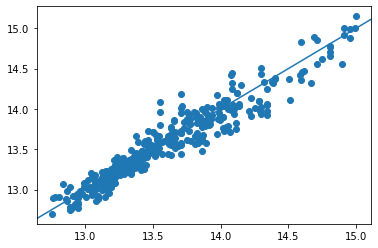

In [51]:
plt.scatter(y_true,y_corr)
plt.axline((14, 14), slope=1)

In [40]:
np.sum([r[0]*r[1] for r in result])/np.sum([r[1] for r in result])

10.594255228483332